Example code to help reproduce the results in O'Sullivan et al. (2022), using the catalogue and frequency spectra data tables that can be found at https://lofar-mksp.org/data/.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
# to install see https://github.com/CIRADA-Tools/RM-Tools
from RMtools_1D import do_RMsynth_1D as rm1d

In [17]:
#filepath='/path/to/file/'
filepath='/Users/shane/Documents/LOFAR/GRG_LOTSS/DDFacet_cube/DR2_polcats/polcat_May2020/'
hdu1=pf.open(filepath+'LoTSS_DR2_RMGrid_v1_RMTable.fits')
cat=hdu1[1].data
cols=hdu1[1].columns
hdu2=pf.open(filepath+'LoTSS_PolSpectra_v1.fits')
spectra=hdu2[1].data
cols_spec=hdu2[1].columns

The RM Grid catalogue column names are described in Appendix B of O'Sullivan et al. (2022). See also https://github.com/CIRADA-Tools/RMTable and https://github.com/CIRADA-Tools/PolSpectra for detailed descriptions. 

In [18]:
cols.names;
cols_spec.names;

Example of accessing the Stokes Q and U spectra for a particular source in the RM Grid catalogue through the unique identifier "cat_id". 

In [19]:
src_idx = np.where(cat.field('cat_id') == 3510)
freq = spectra.field('freq')[src_idx]
stokesQ = spectra.field('stokesQ')[src_idx]
stokesU = spectra.field('stokesU')[src_idx]
stokesQerr = spectra.field('stokesQ_error')[src_idx]
stokesUerr = spectra.field('stokesU_error')[src_idx]

The Stokes I spectral behaviour for 97.6 kHz channels is unreliable and thus not included in the spectra. However, one can generate model Stokes I values using the 144 MHz value ("stokesI") and assuming a spectral index for the source (unknown, but $S \propto \nu^{-0.7}$ is a good guess). 

In [21]:
alpha = -0.7
stokesI = cat.field('stokesI')[src_idx]*(freq/144.e6)**(alpha)
# use same Stokes I error for each channel (unrealistic)
stokesIerr = stokesI*0.0 + cat.field('stokesI_err')[src_idx]

Run RM synthesis using just the Stokes Q and U values, as done in O'Sullivan et al. (2022).

In [23]:
freqQU=[freq[0][:],stokesQ[0][:],stokesU[0][:],stokesQerr[0][:],stokesUerr[0][:]]
rmdict_qu=rm1d.run_rmsynth(freqQU,verbose=False,showPlots=False,phiMax_radm2=120, dPhi_radm2=0.1 )

Alternatively, run RM synthesis using a model Stokes I spectrum. 

> Trying [freq_Hz, I, Q, U, dI, dQ, dU] ... success.
Successfully read in the Stokes spectra.
Plotting the input data and spectral index fit.
PhiArr = -120.00 to 120.00 by 0.10 (2401 chans).
Weight type is 'variance'.
Running RM-synthesis by channel.
  [========================================] 100%
Calculating 1D RMSF and replicating along X & Y axes.
> RM-synthesis completed in 1.60 seconds.

--------------------------------------------------------------------------------
RESULTS:

FWHM RMSF = 1.27 rad/m^2
Pol Angle = 110 (+/-0.1404) deg
Pol Angle 0 = 25.03 (+/-0.7862) deg
Peak FD = -66.41 (+/-0.003112) rad/m^2
freq0_GHz = 0.1375 
I freq0 = 1.518 Jy/beam
Peak PI = 0.02675 (+/-0.0001311) Jy/beam
QU Noise = 0.002763 Jy/beam
FDF Noise (theory)   = 0.0001311 Jy/beam
FDF Noise (Corrected MAD) = 0.0003002 Jy/beam
FDF Noise (rms)   = 0.000912 Jy/beam
FDF SNR = 204 
sigma_add(q) = 3.714 (+0.1386, -0.1316)
sigma_add(u) = 3.755 (+0.14, -0.1329)
Fitted polynomial order = 2 

-------------------

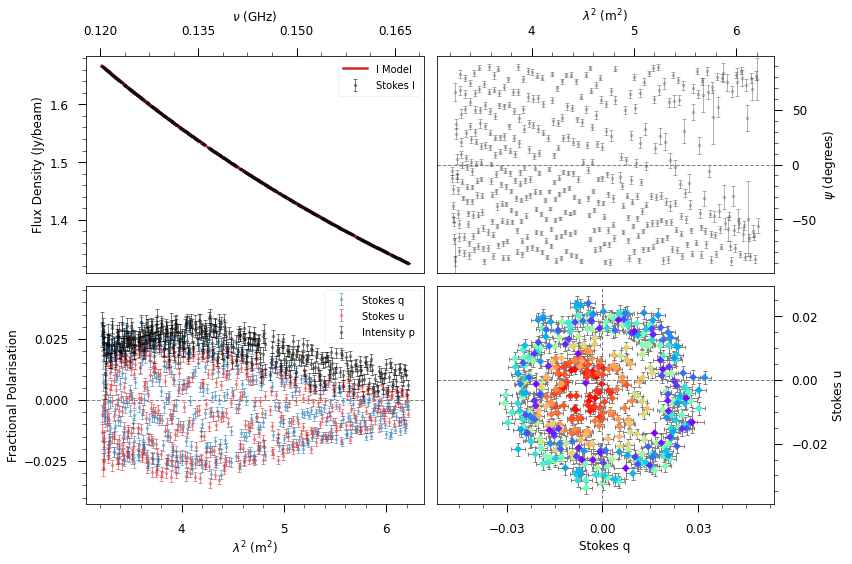

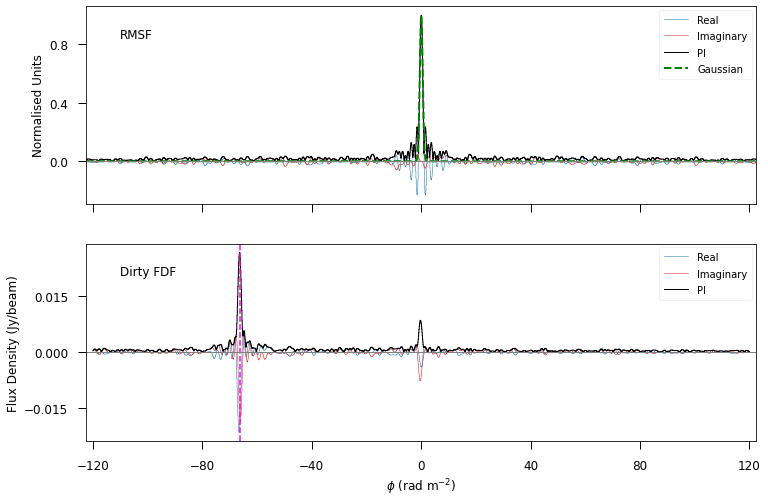

In [24]:
freqiqu=[freq[0][:],stokesI[0][:],stokesQ[0][:],stokesU[0][:],stokesIerr[0][:],stokesQerr[0][:],stokesUerr[0][:]]
rmdict_iqu=rm1d.run_rmsynth(freqiqu,verbose=True,showPlots=True,phiMax_radm2=120, dPhi_radm2=0.1 )

Compare output with catalogue value

In [26]:
# RM value from fitted peak
print("{0:.3f}".format(rmdict_qu[0]['phiPeakPIfit_rm2']))
# catalogued RM value
print(cat.field('rm')[src_idx])

-66.406
[-66.406]


In [ ]:
RM value after using a model Stokes I spectrum

In [27]:
print("{0:.3f}".format(rmdict_iqu[0]['phiPeakPIfit_rm2']))

-66.405


For details on the standard output from RM tools see https://github.com/CIRADA-Tools/RM-Tools/wiki/RMsynth1D#output-values

In [28]:
print(rmdict_qu[0])

{'dFDFcorMAD': 0.00030279954080469906, 'dFDFrms': 0.0009110968094319105, 'phiPeakPIchan_rm2': -66.4000015258789, 'dPhiPeakPIchan_rm2': 0.003046457834287295, 'ampPeakPIchan': 0.027039721608161926, 'ampPeakPIchanEff': 0.027039005420864404, 'dAmpPeakPIchan': 0.00012976650831452517, 'snrPIchan': 208.3721135705035, 'indxPeakPIchan': 536, 'peakFDFimagChan': 0.004697259049862623, 'peakFDFrealChan': 0.02662859857082367, 'polAngleChan_deg': 5.002001762390137, 'dPolAngleChan_deg': 0.13748427880128997, 'polAngle0Chan_deg': 23.69639341623042, 'dPolAngle0Chan_deg': 0.751775804993709, 'phiPeakPIfit_rm2': -66.40612735009348, 'dPhiPeakPIfit_rm2': 0.0030463285442841937, 'ampPeakPIfit': 0.02704086920785111, 'ampPeakPIfitEff': 0.02704015305094899, 'dAmpPeakPIfit': 0.00012976650831452517, 'snrPIfit': 208.38095714427374, 'indxPeakPIfit': 535.9387408231133, 'peakFDFimagFit': 0.0046105598099114836, 'peakFDFrealFit': 0.026624974966644517, 'polAngleFit_deg': 4.912148189585884, 'dPolAngleFit_deg': 0.13747844404